<a href="https://colab.research.google.com/github/nsthomp5/MAT422/blob/main/MAT_422_HW_3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Name: Nicholas Thompson
# ID: 1223100502
# Class: MAT 422
# Assignment: HW 3.5, 3.6

In [56]:
import numpy as np # for arrays
import sklearn.cluster as sk # for K-Means
import matplotlib.pyplot as plt # For plotting
from sklearn import svm # For Support Vector Machines
import pandas as pd # For Dataframes

K-Means are used for cluster analysis, where data is clustered into a chosen number of clusters, and each data point is in the vicinity of one of them, decided by the distance from the mean of each cluster. It is useful for identifying clusters of data in large datasets, and has applications where cluster analysis can help identify particular subsets of the population for more specific analysis. Identifying clusters in data is possible using the elbow method, where plotting a scatterplot of the data can produce a line through them that has sharp bends due to sudden, large changes in trajectory.

In [57]:
# 3.5 K-Means
# Example 1: 2 clusters

A = [1, 1, 2, 3, 4, 4, 5, 6, 7, 7, 15, 16, 17, 17, 19, 20, 22] # Clear 2 clusters

KModel = sk.KMeans(2) # Chosen 2 clusters
KModel.fit(np.array(A).reshape(-1, 1))

print(KModel.cluster_centers_)
print(KModel.labels_)

[[18.]
 [ 4.]]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]


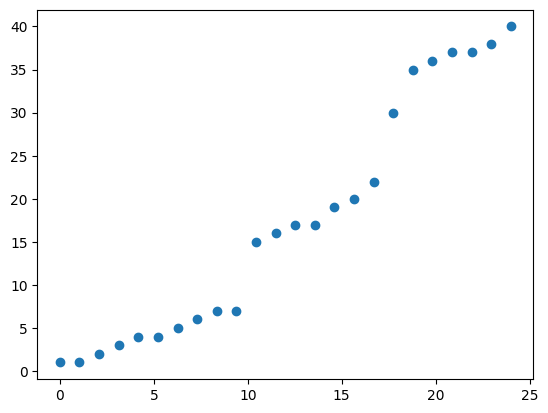

In [58]:
# Example 2: Plotting the Elbow

X = np.linspace(0, 24, 24)
X = np.array(X).reshape(-1, 1)
y = np.array([1, 1, 2, 3, 4, 4, 5, 6, 7, 7, 15, 16, 17, 17, 19, 20, 22, 30, 35, 36, 37, 37, 38, 40])

plt.scatter(X, y) # Plot shows 3 clear clusters

In [59]:
KModel = sk.KMeans(3) # Chosen 3 clusters
KModel.fit(y.reshape(-1,1))

print(KModel.cluster_centers_)
print(KModel.labels_)

[[ 4.        ]
 [36.14285714]
 [18.        ]]
[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1]


Support Vector Machines use hyperplanes, finding the best plane to split the data according to clusters of inputs and outputs by maximizing the distance between the groups of points separated by the plane. It is most useful for classification problems, where the hyperplane aids in label prediction, but it can be used in regression as well, although its cost function does not seek extrapolation, so the regression line may only be representative of a subset of the data. The loss function can also be chosen to prioritize distance above completely separating the labels, in the case that label clusters overlap more than is separable.

[19.49041505]


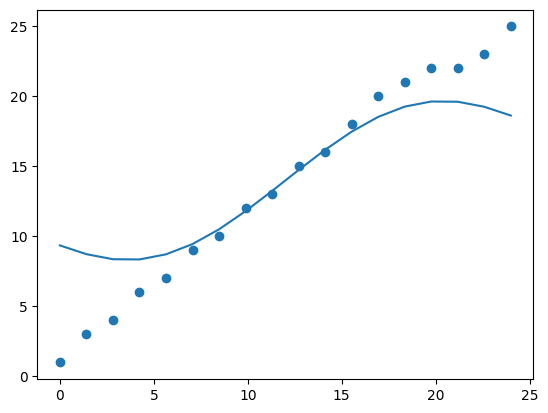

In [62]:
# 3.6 Support Vector Machines
# Example 1: Regression

X = np.linspace(0, 24, 18)
X = np.array(X).reshape(-1, 1)
y = [1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 20, 21, 22, 22, 23, 25]

regression = svm.SVR()
regression.fit(X,y)

print(regression.predict([[19]]))

plt.scatter(X, y)
plt.plot(X, regression.predict(X)) # Regression line shows how only a subset of the data is trained on without regard for extrapolation

In [61]:
# Example 2: Classification


hd_df = pd.read_csv('framingham.csv') # dataset of heart disease presence over 10 years
hd_df.head() # see feature and outcome representation
hd_df.dropna(inplace=True) # drop missing values, could create bias in model where people may not prefer to answer certain questions

X = hd_df.drop('TenYearCHD', axis=1) # features
y = hd_df['TenYearCHD'] # outcomes

classification = svm.SVC()
classification.fit(X,y)

print(classification.predict(X)) # 0 or 1 labels
print(classification.score(X,y)) # Accuracy


[0 0 0 ... 0 0 0]
0.8484682713347921
